# Explore pink pidgeon segmentations

To install PyAudioAnalysis
```python
git clone https://github.com/tyiannak/pyAudioAnalysis.git
cd pyAudioAnalysis
pip install -r ./requirements.txt
pip install -e .
cd ..
```

In [1]:
import matplotlib.pyplot as plt
import sound_segmentation
PSeg = sound_segmentation 
import os
import pyAudioAnalysis
import numpy as np
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS

In [2]:
audio_path = os.path.join(os.getcwd(), "../../inputs/mp3", "XC155388-Pink_Pigeon_(song,_Mauritius,_Black_River_Gorge,_nov2012,_2).MP3")
labels_path = os.path.join(os.getcwd(), "../../", "inputs/onset_offset", "XC155388-Pink_Pigeon-Nesoenas_mayeri.txt")

segments = PSeg.process_data(audio_path,labels_path=labels_path)

In [3]:

fs,num_a,_,_ = PSeg.load_data(audio_path,labels_path=labels_path)

In [4]:
all_segs = []
for seg in segments:
    all_segs.extend(seg)

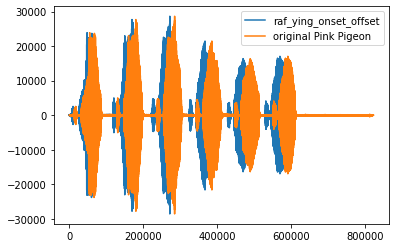

In [5]:
fig = plt.figure()
plt.plot(all_segs,label="raf_ying_onset_offset")
plt.plot(num_a,label="original Pink Pigeon")
plt.legend()
plt.show()


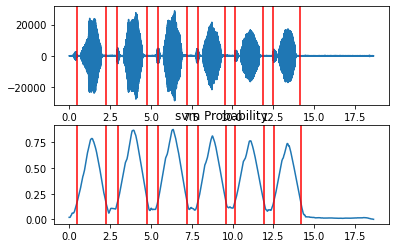

In [6]:




[Fs, x] = aIO.read_audio_file(audio_path)
segments = aS.silence_removal(x, Fs, 0.020, 0.020, smooth_window = 1.0, weight = 0.2, plot = True)



In [7]:

segs_th=[]
for seg in segments:
    onset = int(seg[0]*fs)
    offset = int(seg[1]*fs)
    wave = num_a[onset:offset]
    segs_th.extend(wave)


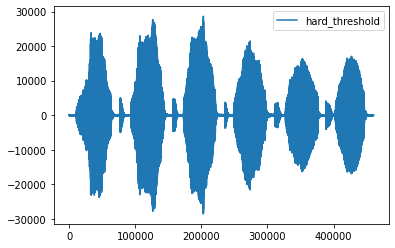

In [8]:
fig = plt.figure()
plt.plot(segs_th,label="hard_threshold")

plt.legend()
plt.show()

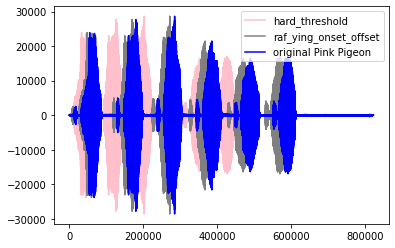

In [9]:
fig = plt.figure()
plt.plot(segs_th,color='pink',label="hard_threshold")
plt.plot(all_segs,color='grey',label="raf_ying_onset_offset")
plt.plot(num_a,color='blue',label="original Pink Pigeon")
plt.legend()
plt.show()